# Calc RF

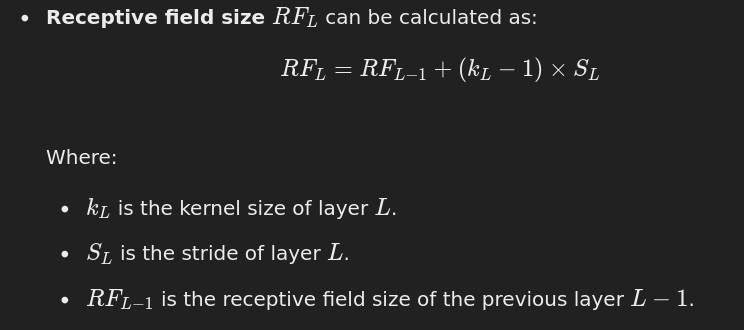

### padding 

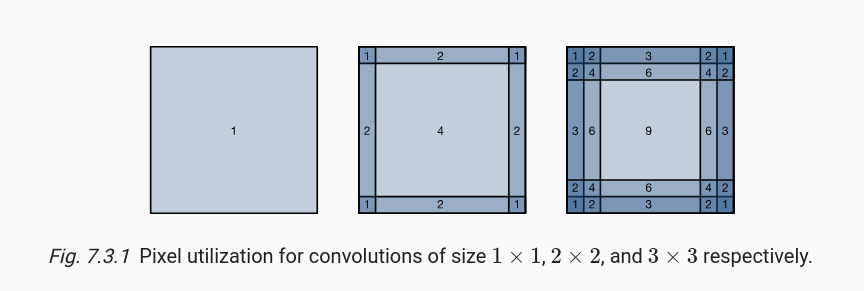

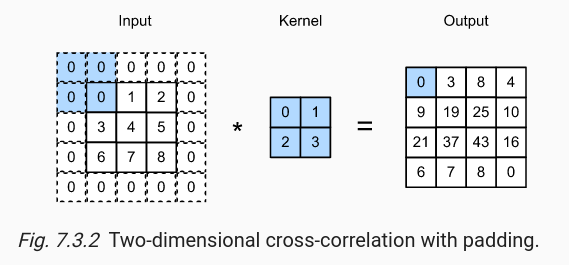


### stride  

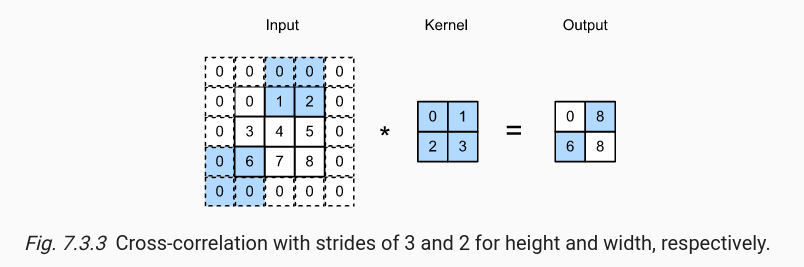

calc demo

```
Layer 1: 3x3 convolution, stride 1
Layer 2: 3x3 convolution, stride 2
Layer 3: 3x3 convolution, stride 1

layer1:
            RF1​=3
(since it is the first layer, starting with kernel size)

layer2:
            RF2​=RF1​+(3−1)×2=3+4=7

layer3:
            RF3​=RF2​+(3−1)×1=7+2=9

```

In [4]:
import torch
import torch.nn as nn

# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        return x

# Function to compute receptive field
def compute_receptive_field(layers):
    receptive_field = 1
    stride = 1
    padding = 0
    
    for layer in layers:
        if isinstance(layer, nn.Conv2d):
            kernel_size = layer.kernel_size[0]
            stride *= layer.stride[0]
            padding += layer.padding[0] * (stride - 1)
            receptive_field = (receptive_field - 1) * stride + kernel_size
        elif isinstance(layer, nn.MaxPool2d):
            stride *= layer.stride
            receptive_field = (receptive_field - 1) * stride + layer.kernel_size
    
    return receptive_field

# Instantiate the model
model = SimpleCNN()

# Get the list of layers
layers = list(model.children())

# Calculate the receptive field
rf = compute_receptive_field(layers)
print("Receptive field of the network:", rf)


Receptive field of the network: 15
